In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [7]:
PATH = "chennai_house_price.csv"
dataset = pd.read_csv(PATH)
important_columns = ["price", "area", "status", "bhk", "bathroom", "age"]
dataset = dataset[important_columns].copy()
dataset["status"] = dataset["status"].replace({"Ready to move": 1, "Under Construction": 0}) # Делаем статусы целочисленными
dataset.dropna(inplace=True) # Удалили строки со значением Nan
dataset.reset_index(drop=True, inplace=True) # Пронумеровал id заново
dataset.rename(columns={"bhk": "bedrooms"}, inplace=True) # Изменить название столбца
dataset['price'] = dataset['price'].astype(int)
dataset.head(10)

,price,area,status,bedrooms,bathroom,age
0,49,1028,1,2,2.0,3.0
1,42,588,0,2,1.0,0.0
2,188,2221,0,3,3.0,0.0
3,240,1500,1,3,3.0,1.0
4,113,2343,1,4,4.0,5.0
5,50,1045,1,2,2.0,1.0
6,57,920,0,2,1.0,0.0
7,42,588,0,2,1.0,0.0
8,50,1152,1,2,3.0,1.0
9,47,920,0,2,2.0,0.0


<Axes: >

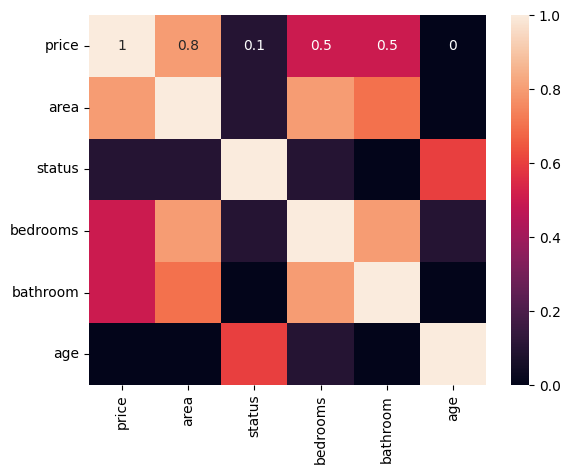

In [8]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)

In [9]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset[["area", "age"]],
    (dataset["price"] > 100).astype(int),
    test_size=0.2
)

In [10]:
model = GaussianNB()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(predictions, test_output)

print(f"Точность модели на тестовом участке = {accuracy}")

Точность модели на тестовом участке = 0.8879310344827587
